# Trabajo Computacional 3

In [2]:
#import sys
#sys.path.append('/home/lucia/.local/lib/python2.7/site-packages')

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import numpy as np
from  collections  import defaultdict
from scipy import optimize
import os
from lectura import ldata
import community
import rpy2.robjects as robjects
#import robjects as robjects


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
# El directorio que vamos a usar en cada lectura de datos de ahora en mas
directorio = os.path.dirname(os.path.realpath("dolphins.txt"))

In [3]:
fnDOL = os.path.join(directorio,'dolphins.gml')
delfines = nx.read_gml(fnDOL)
generos=ldata('dolphinsGender.txt')

In [4]:
# Asigno la clase genero a cada nodo de la red
for delfin in generos:
    if delfin[1]=='m':
        delfines.node[delfin[0]]["genero"]=0
    elif delfin[1]=='f':
        delfines.node[delfin[0]]["genero"]=1
    else:
        delfines.node[delfin[0]]["genero"]=2

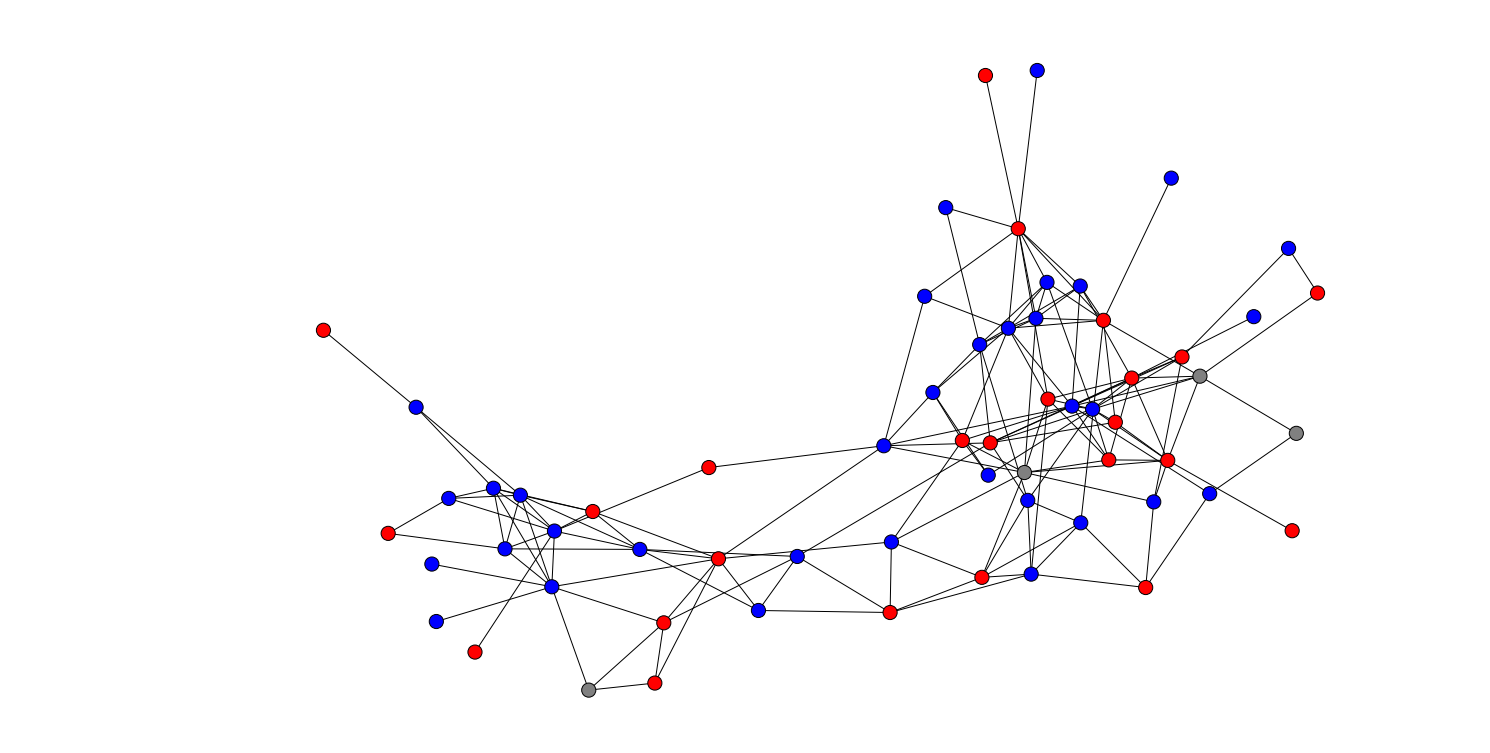

In [5]:
plt.figure(figsize=(20,10))
nx.draw(delfines, 
        width=1, 
        node_color=["blue" if g==0 else "red" if g==1 else "grey"  for g in nx.get_node_attributes(delfines, "genero").values()], 
        node_size=200,
        with_labels=False,
       pos=nx.fruchterman_reingold_layout(delfines)
       )
plt.show()

In [6]:
#delfines.edges

Encuentre la partición en clusters de esta red utilizando la metodología Louvain, infomap,fast_greedy y edge_betweenness. Visualice los resultados gráficamente.

In [7]:
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name, v_names){
            require("igraph")     
            
            G <- read.graph(file, "gml")
            V(G)$name <- as.character(unlist(v_names))
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- fastgreedy.community(G)
                #c <- cluster_fast_greedy(G, merges = TRUE, modularity = TRUE, membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- edge.betweenness.community(G)
                #c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- multilevel.community(G)
                #c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                #c <- cluster_infomap(G)
                c <- infomap.community(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(list(membership(c), as.character(V(G)$name)))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name, list(dict(nxG.nodes(data=True)).keys()))
    os.remove(gml_file_name)
    return {name: int(label) for name, label in zip(labels[1],labels[0])}

In [8]:
labels_fastgreedy = community(delfines,"fast_greedy")
labels_bet = community(delfines,"edge_betweenness")
labels_louvain = community(delfines,"louvain")
labels_infomap = community(delfines,"infomap")

/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: igraph

  warnings.warn(x, RRuntimeWarning)
/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘igraph’


  warnings.warn(x, RRuntimeWarning)
/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    decompose, spectrum


  warnings.warn(x, RRuntimeWarning)
/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:base’:

    union


  warnings.warn(x, RRuntimeWarning)


dict_values([1, 1, 1, 2, 1, 1, 3, 2, 2, 4, 3, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 3, 4, 1, 4, 3, 4, 3, 2, 1, 3, 1, 4, 3, 1, 2, 3, 1, 4, 4, 3, 5, 1, 4, 3, 4, 4, 3, 1, 1, 3, 4, 3, 3, 3, 2, 3, 3, 4, 3, 3, 5])


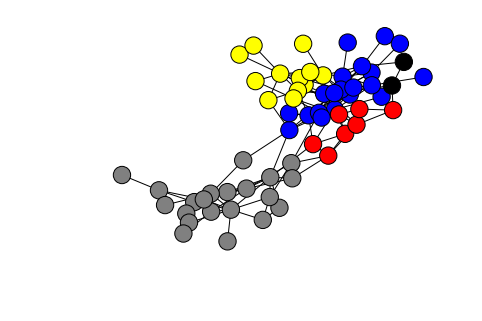

In [10]:
comunidades=labels_bet
    
nx.set_node_attributes(delfines, comunidades, 'edge_betweenness')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0
                              else "yellow" if g==4.0 else "black" if g==5.0 else "green" for g in nx.get_node_attributes(delfines,"edge_betweenness").values()],)
print (nx.get_node_attributes(delfines, 'edge_betweenness').values())

dict_values([2, 2, 2, 2, 2, 4, 1, 1, 2, 3, 1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 3, 2, 1, 2, 3, 3, 1, 2, 2, 3, 1, 3, 3, 1, 2, 2, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 4, 2])


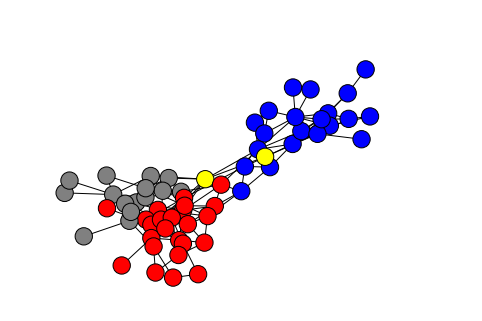

In [22]:
comunidades=labels_fastgreedy
    
nx.set_node_attributes(delfines, comunidades, 'fastgreedy')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0
                              else "yellow" if g==4.0 else "black" if g==5.0 else "green" for g in nx.get_node_attributes(delfines,"fastgreedy").values()],)
print (nx.get_node_attributes(delfines, "fastgreedy").values())

dict_values([1, 1, 1, 4, 1, 5, 2, 4, 4, 3, 2, 1, 4, 2, 1, 5, 2, 1, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 4, 5, 2, 1, 3, 2, 5, 4, 4, 1, 3, 3, 2, 1, 1, 3, 2, 3, 3, 2, 1, 1, 2, 3, 2, 2, 2, 5, 2, 2, 3, 4, 5, 1])


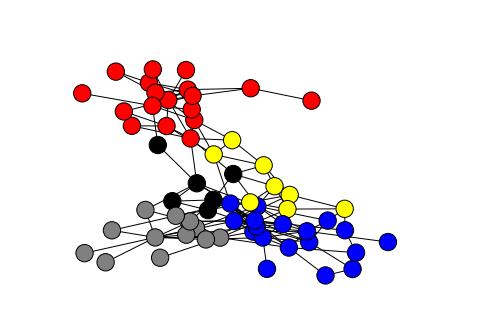

In [12]:
comunidades = labels_louvain
    
nx.set_node_attributes(delfines, comunidades, 'louvain')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0
                              else "yellow" if g==4.0 else "black" if g==5.0 else "green" for g in nx.get_node_attributes(delfines,"louvain").values()],)
print (nx.get_node_attributes(delfines, "louvain").values())

dict_values([2, 2, 2, 4, 2, 5, 1, 4, 4, 3, 1, 2, 4, 1, 2, 5, 1, 2, 2, 2, 2, 1, 3, 2, 3, 1, 3, 1, 4, 5, 1, 2, 3, 1, 5, 4, 1, 2, 3, 3, 1, 2, 2, 3, 1, 3, 3, 1, 2, 2, 1, 3, 1, 1, 1, 4, 1, 1, 3, 1, 5, 2])


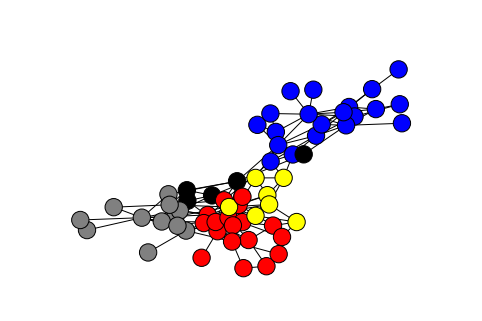

In [13]:
comunidades = labels_infomap

    
nx.set_node_attributes(delfines, comunidades, 'infomap')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0
                              else "yellow" if g==4.0 else "black" if g==5.0 else "green" for g in nx.get_node_attributes(delfines,"infomap").values()],)
print (nx.get_node_attributes(delfines, "infomap").values())

In [48]:
#Modularidad
def modularidad(G,atributo):
    Q=0. #modularidad
    TotalEdges=G.number_of_edges()
    for cluster in set(nx.get_node_attributes(G,atributo).values()):
        nodescluster = [x for x,y in G.nodes(data=True) if y[atributo]==cluster]
        print(nodescluster)
        L=0.#Cantidad de edges al interior de un cluster 
        a=0.#candidad de posibles edges del cluster
        for nodo1 in nodescluster:
            #a=a+G.degree(nodo1)
            for nodo2 in nodescluster:
                if (nodo1,nodo2) in G.edges():
                    L+=1
                a+=G.degree(nodo1)*G.degree(nodo2)/(2*TotalEdges)
        #Q=Q+(L/(2*TotalEdges)-(a/(2*TotalEdges))**2) #Se suma la modularidad del cluster
        Q=Q+1./(2*TotalEdges)*(L-a)
    return Q

In [15]:
#Silouethe
def silouethe(G,atributo):
    S={}
    for nodo,atri in G.nodes(data=True):
        dis=nx.diameter(G)

        cluster=atri[atributo]
        nodescluster = [x for x,y in G.nodes(data=True) if y[atributo]==cluster]
        a=np.mean([nx.shortest_path_length(G,nodo,nodo2) for nodo2 in nodescluster])
        b=min([nx.shortest_path_length(G,nodo,nodo2)for nodo2 in G.nodes()-nodescluster])        
        s=(b-a)/max(a,b)
        S[nodo]=s
    return np.mean(list(S.values()))

In [49]:
algoritmo='fastgreedy'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

['PL', 'TR77', 'SN96', 'Zap', 'Grin', 'SN4', 'Number1', 'Cross', 'SN90', 'Double', 'CCL', 'Beak', 'Hook', 'Zipfel', 'Topless', 'Whitetip', 'Five', 'Web', 'Gallatin', 'Wave', 'Knit']
['TR99', 'TR120', 'Bumper', 'TSN103', 'SN100', 'DN16', 'Kringel', 'Ripplefluke', 'Scabs', 'Thumper', 'Shmuddel', 'SN63', 'Mus', 'Jonah', 'Jet', 'DN63', 'MN83', 'Vau', 'Fork', 'MN60', 'Stripes', 'TR82', 'Oscar', 'TSN83']
['TR88', 'Trigger', 'Notch', 'SMN5', 'Patchback', 'Upbang', 'Fish', 'SN9', 'Quasi', 'DN21', 'MN105', 'Beescratch', 'Zig', 'MN23', 'Haecksel']
['Feather', 'SN89']
-0.0001384438906690728 -0.631693900647


In [30]:
algoritmo='edge_betweenness'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

-0.011253510541513346 -0.64202092343


In [31]:
algoritmo='louvain'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.03166409556583999 -0.632504707578


In [32]:
algoritmo='infomap'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.0062695304774336835 -0.639991385217


In [33]:
algoritmo='genero'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.12370950516197939 -0.576322302739


In [85]:
def MatrizConfu(G,atributo1,atributo2):
    tx=len(set(nx.get_node_attributes(G,atributo1).values()))
    ty=len(set(nx.get_node_attributes(G,atributo2).values()))
    M=np.zeros((tx+1,ty+1))
    for node,atri in G.nodes(data=True):
        i=int(atri[atributo1])
        j=int(atri[atributo2])
        M[i][j]+=1
    M=M/np.sum(M)
    return M

In [86]:
G=delfines
atributo=[0,0,0,0,0]
atributo[0]='fastgreedy'
atributo[1]='edge_betweenness'
atributo[2]='louvain'
atributo[3]='infomap'
atributo[4]='genero'
lista=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
for i in range(5):
    for j in range(5):
        lista[i][j]=MatrizConfu(G,atributo[i],atributo[j])
#lista es la tabla de matrices de confusión

In [87]:
informacion=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
for i in range(5):
    for j in range(5):
        matriz=lista[i][j]
        marginal1=np.sum(matriz,axis=0)
        marginal2=np.sum(matriz,axis=1)
        entropiatotal=0
        entropia1=0
        entropia2=0
        flatmatriz = [item for sublist in matriz for item in sublist]
        for k in range(len(flatmatriz)):
            if flatmatriz[k]>0:
                    entropiatotal+=-flatmatriz[k]*np.log(flatmatriz[k])

        for k in range(len(marginal1)):
            if marginal1[k]>0:
                    entropia1+=-marginal1[k]*np.log(marginal1[k])

        for k in range(len(marginal2)):
            if marginal2[k]>0:
                    entropia2+=-marginal2[k]*np.log(marginal2[k])

        try:
            informacion[i][j]=float(2*(entropia1+entropia2-entropiatotal)/(entropia1+entropia2))
        except:
            informacion[i][j]=0

In [88]:
informacion

[[1.0,
  0.6242244680782085,
  0.6996251589627197,
  0.7194187744255547,
  0.12970369996501077],
 [0.6242244680782085,
  1.0,
  0.8784970183378741,
  0.911097656787842,
  0.20791114932240795],
 [0.6996251589627197,
  0.8784970183378742,
  1.0,
  0.8635605797988549,
  0.15873678441061945],
 [0.7194187744255547,
  0.911097656787842,
  0.8635605797988551,
  1.0,
  0.24645512416119403],
 [0.12970369996501077,
  0.20791114932240795,
  0.15873678441061945,
  0.24645512416119403,
  1.0]]

In [136]:
representacion=np.zeros((3,len(set(nx.get_node_attributes(G,"infomap").values()))+1))

for nodo in G.nodes:
    dict1=nx.get_node_attributes(delfines, "genero")
    dict2=nx.get_node_attributes(delfines, "infomap")
    representacion[dict1[nodo],dict2[nodo]]+=1
representacion

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


array([[  0.,  16.,   3.,   9.,   5.,   0.,   1.],
       [  0.,   2.,  13.,   3.,   2.,   4.,   0.],
       [  0.,   2.,   0.,   0.,   0.,   1.,   1.]])

In [89]:
#random

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


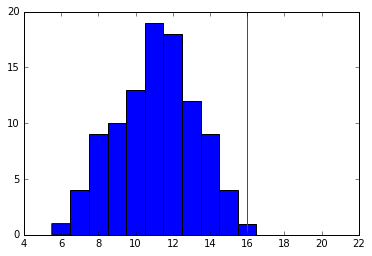

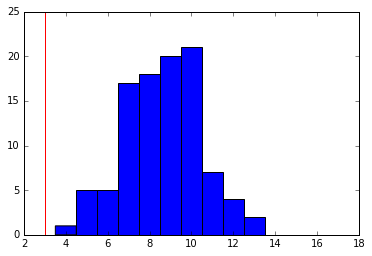

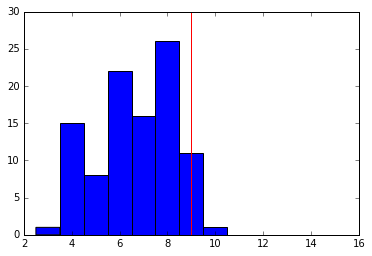

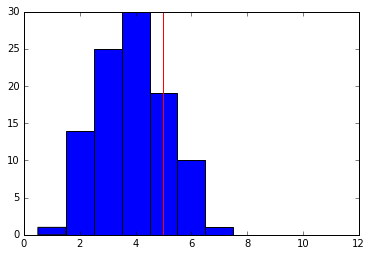

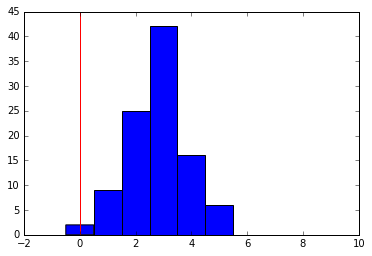

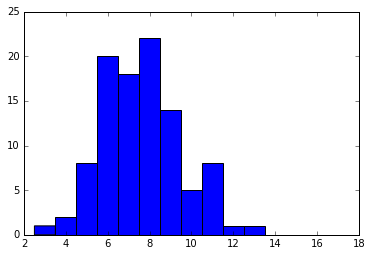

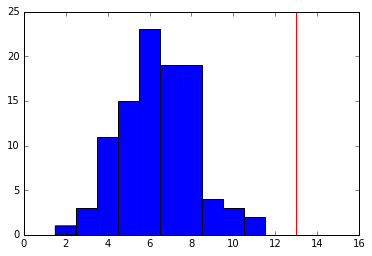

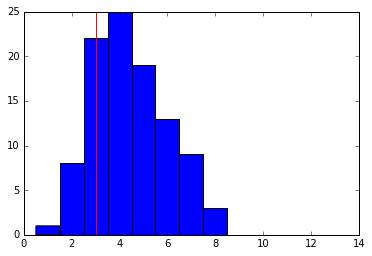

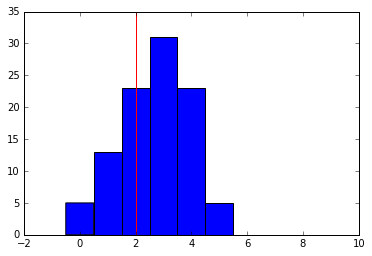

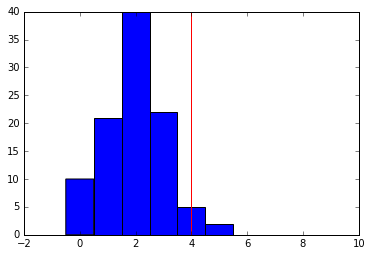

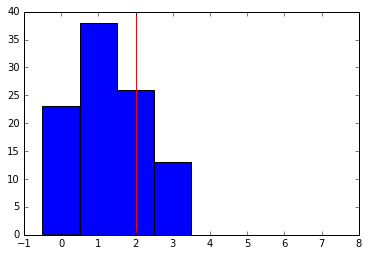

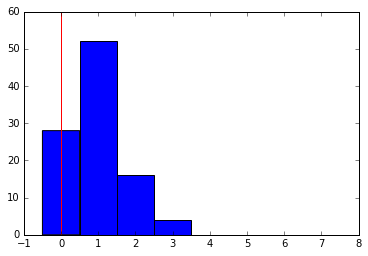

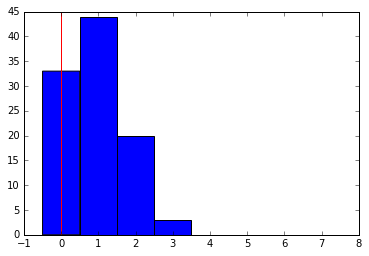

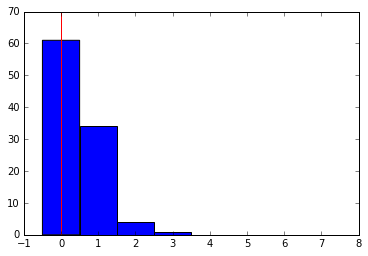

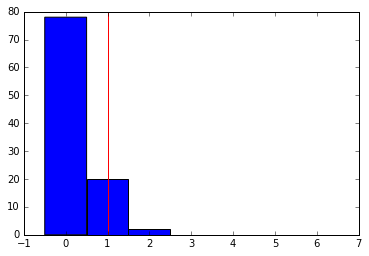

In [139]:
sexos=dict(delfines.node.data("genero"))
N=100
G=delfines
random=np.zeros((4,N))
represrandom=np.zeros((3,len(set(nx.get_node_attributes(G,"infomap").values()))+1,N))
# N realizaciones aleatorias de genero  
for j in range(N):
    for delfin,genero in zip(G,np.random.permutation(list(sexos.values()))):
        # Asigna genero a delfines(nodos) de test a partir de la realizacion aleatoria       
        G.node[delfin]["genero2"]=genero
        


    for nodo in G.nodes:
        dict1=nx.get_node_attributes(delfines, "genero2")
        dict2=nx.get_node_attributes(delfines, "infomap")
        represrandom[dict1[nodo],dict2[nodo],j]+=1

for k in range(3):
    for l in range (1,6):
        left_of_first_bin = represrandom[k,l,:].min() - float(1)/2
        right_of_last_bin = represrandom[k,l,:].max() + float(1)/2
        plt.hist(represrandom[k,l,:],np.arange(left_of_first_bin, right_of_last_bin + 5, 1))  
        plt.axvline(representacion[k,l], c="red")
        plt.show()